<a href="https://colab.research.google.com/github/Clacops/Aprendizado-data-science-Portfolio/blob/main/data_sus2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4244720it [00:00, 5568860204.84it/s] 


Dados extraídos: 53631 registros.
DIAG_PRINC    0
IDADE         0
DIAS_PERM     0
VAL_TOT       0
MORTE         0
dtype: int64


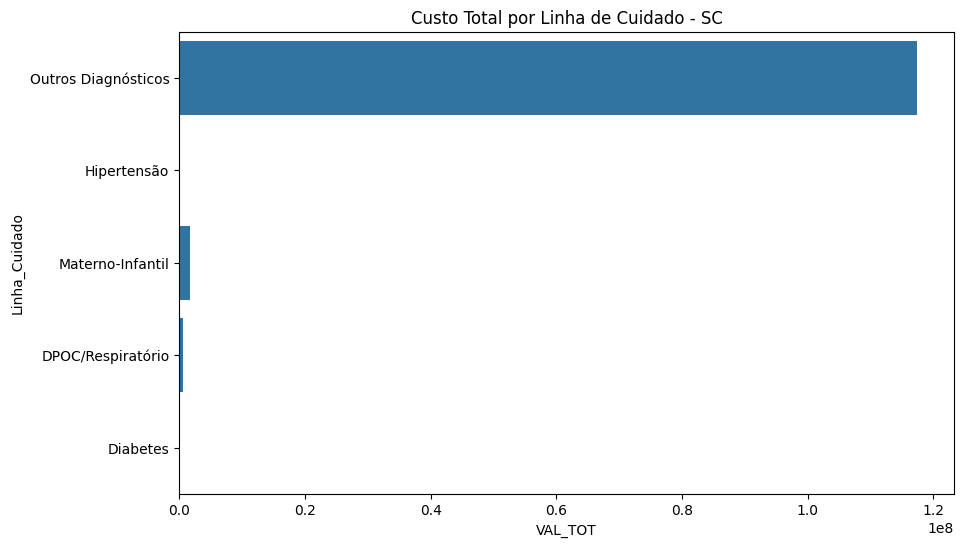

In [5]:
# Análise de Linhas de Cuidado - DATASUS SC
#Este projeto busca realizar exercícios de aprendizado dentro da temática análise de dados para area da saúde. Visa utilizar da expertise como profissional da área unindo novos aprendizados.

# 1. Extração de Dados Reais via PySUS (busca de dados governamentais)
# Instalação das bibliotecas

!pip install pysus pandas matplotlib seaborn

from pysus.online_data.SIH import download
import pandas as pd


# Extração de dados de internação (RD) de SC - Janeiro/2025
# Aqui resolvemos o erro de 'groups' e a conversão de 'ParquetSet'
p_set = download('SC', 2025, 1, groups='RD')
df_bruto = p_set.to_dataframe()
print(f"Dados extraídos: {len(df_bruto)} registros.")


# 2. Tratamento de Inconsistências e Tipagem (limpeza de dados)
# Seleção de colunas estratégicas para Linhas de Cuidado
colunas_foco = ['DIAG_PRINC', 'IDADE', 'DIAS_PERM', 'VAL_TOT', 'MORTE']
df_estudo = df_bruto[colunas_foco].copy()

# Conversão de tipos: Texto para Numérico (Tratamento de erros)
df_estudo['DIAS_PERM'] = pd.to_numeric(df_estudo['DIAS_PERM'], errors='coerce')
df_estudo['VAL_TOT'] = pd.to_numeric(df_estudo['VAL_TOT'], errors='coerce')

# Auditoria de nulos
print(df_estudo.isnull().sum())


## 3. Classificação Especializada (Expertise Clínica)
def classificar_linha(cid):
    cid_str = str(cid).upper()
    if cid_str.startswith('I10'): return 'Hipertensão'
    if cid_str.startswith('E11'): return 'Diabetes'
    if cid_str.startswith('O80'): return 'Materno-Infantil'
    if cid_str.startswith('J44'): return 'DPOC/Respiratório'
    return 'Outros Diagnósticos'

df_estudo['Linha_Cuidado'] = df_estudo['DIAG_PRINC'].apply(classificar_linha)


# 4. Auditoria SQL e Visualização de Insights
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Camada SQL
conn = sqlite3.connect('auditoria_saude.db')
df_estudo.to_sql('internacoes_sc', conn, if_exists='replace', index=False)

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(data=df_estudo, x='VAL_TOT', y='Linha_Cuidado', estimator='sum', errorbar=None)
plt.title('Custo Total por Linha de Cuidado - SC')
plt.show()